In [1]:
# Loading data

import numpy as np
import pandas as pd
import re

train = pd.read_csv('input/train.csv').drop(['PassengerId'], axis=1)
test = pd.read_csv('input/test.csv').drop(['PassengerId'], axis=1)

In [14]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Procentage of survived people in train dataset
print('Survived', float(sum(train['Survived']))/float(len(train)))
print('train.shape = ', train.shape)
print('test.shape = ', test.shape)

Survived 0.3838383838383838
train.shape =  (891, 11)
test.shape =  (418, 10)


In [4]:
# Decoding names

def decodeTitle(row):    
    name = row['Name']
    sex = row['Sex']
    
    if name.find('Mr.') != -1:
        return 'Mr.'
    if name.find('Mrs.') != -1:
        return 'Mrs.'
    if name.find('Miss.') != -1:
        return 'Miss.'
    if sex == 'male':
        return 'Mr.'
    if sex == 'female':
        return 'Miss.'
    
    assert False
    #in test data 125 Mrs., 182 Miss, 517 Mr.    

title_train = train.apply(decodeTitle, axis=1)
title_test = test.apply(decodeTitle, axis=1)

In [5]:
# Decodng cabins

def decodeCabin(row):
    name = row['Cabin']
    if pd.notnull(name):
        cabins = name.split(' ')
        averageCabin = 0.0
        for cabin in cabins:
            if cabin[1:] != '':
                averageCabin += float(cabin[1:]) / float(len(cabins))
            else:
                averageCabin = np.nan
        return cabins[0][0], averageCabin
    else:
        return 'X', np.nan
    
cabin_train = train.apply(decodeCabin, axis=1)
cabin_test = test.apply(decodeCabin, axis=1)
    
cabinSym_train = cabin_train.apply(lambda x: x[0])
cabinNum_train = cabin_train.apply(lambda x: x[1])

cabinSym_test = cabin_test.apply(lambda x: x[0])
cabinNum_test = cabin_test.apply(lambda x: x[1])

In [6]:
# Decoding ticket numbers

def decodeTickets(row):
    tokens = row['Ticket'].split(' ')
    return re.sub("[^0-9]", "", tokens[-1])
    
ticket_train = train.apply(decodeTickets, axis=1)
ticket_test = test.apply(decodeTickets, axis=1)

In [18]:
# Putting decoding data into table

columns_train = [item for item in train.columns if item not in ['Name', 'Cabin', 'Ticket']]
columns_test = [item for item in test.columns if item not in ['Name', 'Cabin', 'Ticket']]

train = train[columns_train]
test = test[columns_test]

train = train.join(pd.DataFrame({'CabinSymbol': cabinSym_train}))
train = train.join(pd.DataFrame({'CabinNumber': cabinNum_train}))
train = train.join(pd.DataFrame({'Title': title_train}))
train = train.join(pd.DataFrame({'TicketNo': ticket_train}))

test = test.join(pd.DataFrame({'CabinSymbol': cabinSym_test}))
test = test.join(pd.DataFrame({'CabinNumber': cabinNum_test}))
test = test.join(pd.DataFrame({'Title': title_test}))
test = test.join(pd.DataFrame({'TicketNo': ticket_train}))

In [19]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinSymbol,CabinNumber,Title,TicketNo
0,0,3,male,22.0,1,0,7.2500,S,X,NaN,Mr.,21171
1,1,1,female,38.0,1,0,71.2833,C,C,85.0,Mrs.,17599
2,1,3,female,26.0,0,0,7.9250,S,X,NaN,Miss.,3101282
3,1,1,female,35.0,1,0,53.1000,S,C,123.0,Mrs.,113803
4,0,3,male,35.0,0,0,8.0500,S,X,NaN,Mr.,373450
5,0,3,male,NaN,0,0,8.4583,Q,X,NaN,Mr.,330877
6,0,1,male,54.0,0,0,51.8625,S,E,46.0,Mr.,17463
7,0,3,male,2.0,3,1,21.0750,S,X,NaN,Mr.,349909
8,1,3,female,27.0,0,2,11.1333,S,X,NaN,Mrs.,347742
9,1,2,female,14.0,1,0,30.0708,C,X,NaN,Mrs.,237736


In [20]:
# Getting rid of missign values in numeric columns

missingAge = np.mean(train2['Age'])
missingFare = np.mean(train2['Fare'])
missingCabinNumber = np.mean(train2['CabinNumber'])

train['Age'] = train['Age'].fillna(missingAge)
train['Fare'] = train['Fare'].fillna(missingFare)
train['CabinNumber'] = train['CabinNumber'].fillna(missingCabinNumber)

test['Age'] = test['Age'].fillna(missingAge)
test['Fare'] = test['Fare'].fillna(missingFare)
test['CabinNumber'] = test['CabinNumber'].fillna(missingCabinNumber)

print('Missing Age Value =', missingAge)
print('Missing Fare Value =', missingFare)
print('Missing Cabin Number Value =', missingCabinNumber)

# Getting rid of missing values in categorial data
train = train.fillna('NA')
test = test.fillna('NA')

print('train.isnull =', train.isnull().values.any())
print('test.isnull =', test.isnull().values.any())

Missing Age Value = 29.699117647058763
Missing Fare Value = 32.2042079685746
Missing Cabin Number Value = 50.28316326530589
train.isnull = False
test.isnull = False


In [1]:
from sklearn.utils import shuffle
train = shuffle(train, random_state = 118)

NameError: name 'train' is not defined

In [23]:
import seaborn as sns
%matplotlib inline

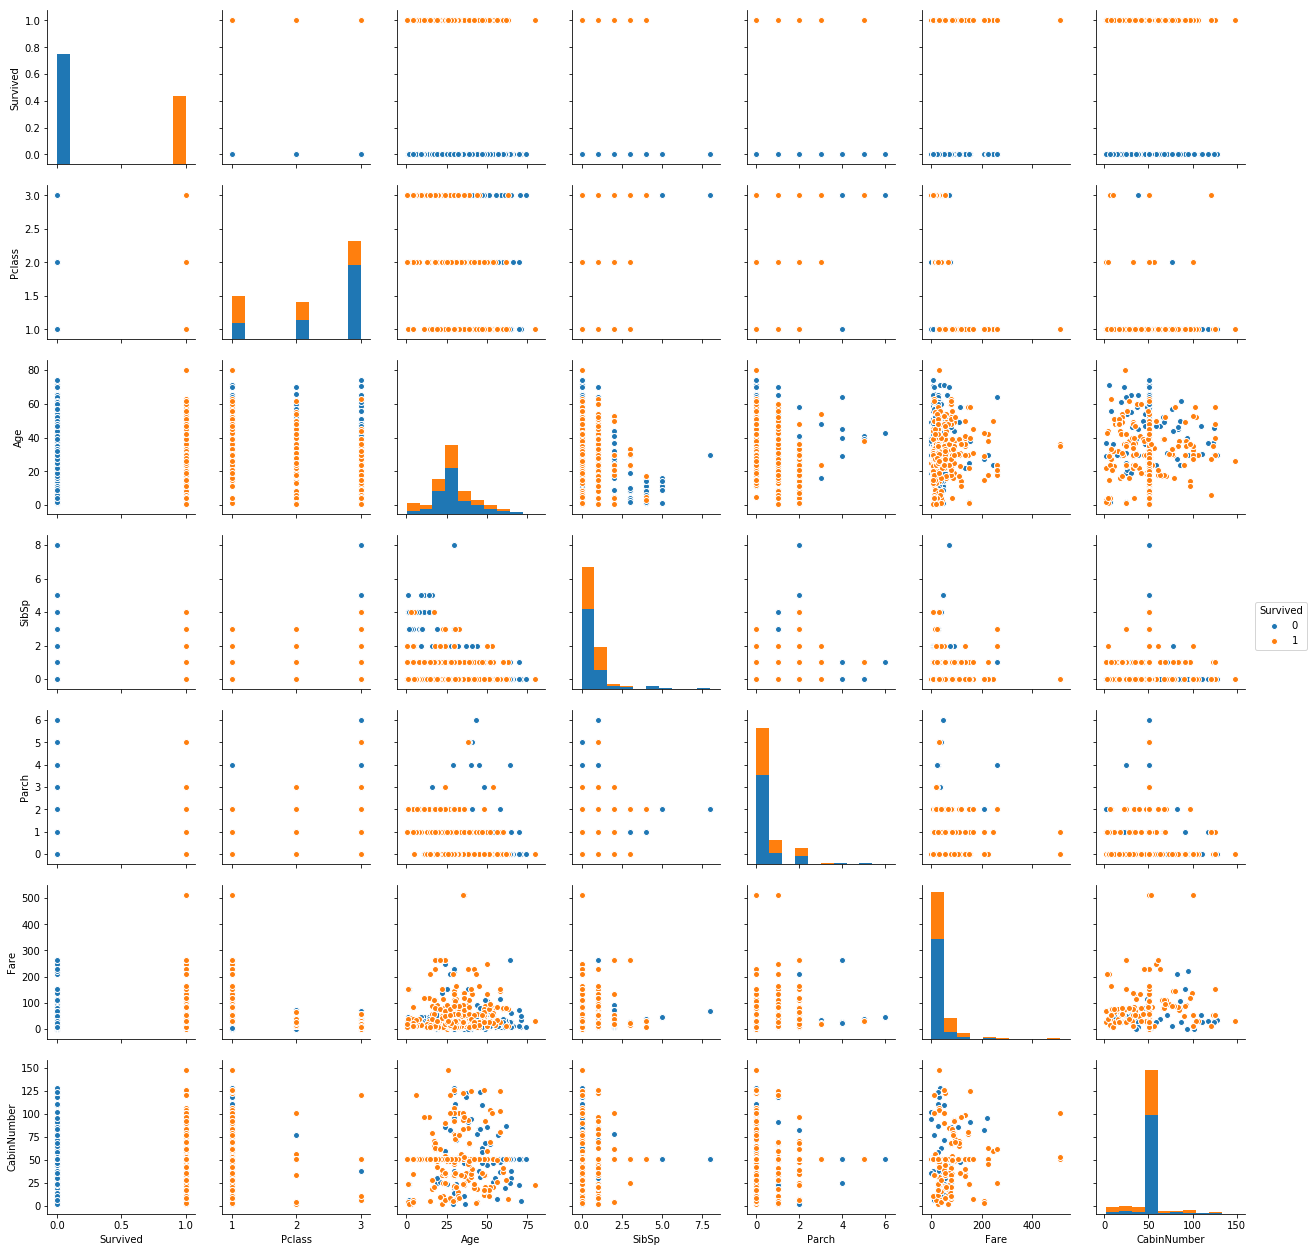

In [26]:
plot = sns.pairplot(train, hue='Survived')

In [31]:
plot.savefig('cross_plot.png', dpi=300)